# Unsupervised Learning Challenge 

* Import data 
* Clean Data
* EDA
* Dimensionality Reduction methods 
    * PCA 
    * t-SNE
    * UMAP
* Clustering techniques 
    * K-means
    * DBSCAN 
    * GMM 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
import time
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import umap
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [2]:
covid_df = pd.read_csv('Cleaned-Data 2.csv')

# Data Cleaning

In [3]:
covid_df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
covid_df.shape

(316800, 27)

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
Fever                      316800 non-null int64
Tiredness                  316800 non-null int64
Dry-Cough                  316800 non-null int64
Difficulty-in-Breathing    316800 non-null int64
Sore-Throat                316800 non-null int64
None_Sympton               316800 non-null int64
Pains                      316800 non-null int64
Nasal-Congestion           316800 non-null int64
Runny-Nose                 316800 non-null int64
Diarrhea                   316800 non-null int64
None_Experiencing          316800 non-null int64
Age_0-9                    316800 non-null int64
Age_10-19                  316800 non-null int64
Age_20-24                  316800 non-null int64
Age_25-59                  316800 non-null int64
Age_60+                    316800 non-null int64
Gender_Female              316800 non-null int64
Gender_Male                316800 non-null int64
Gender_

Looks like a good dataset

# EDA - consider dropping unrelevant variables

In [6]:
covid_df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#correlation table to see if any variables should be dropped 

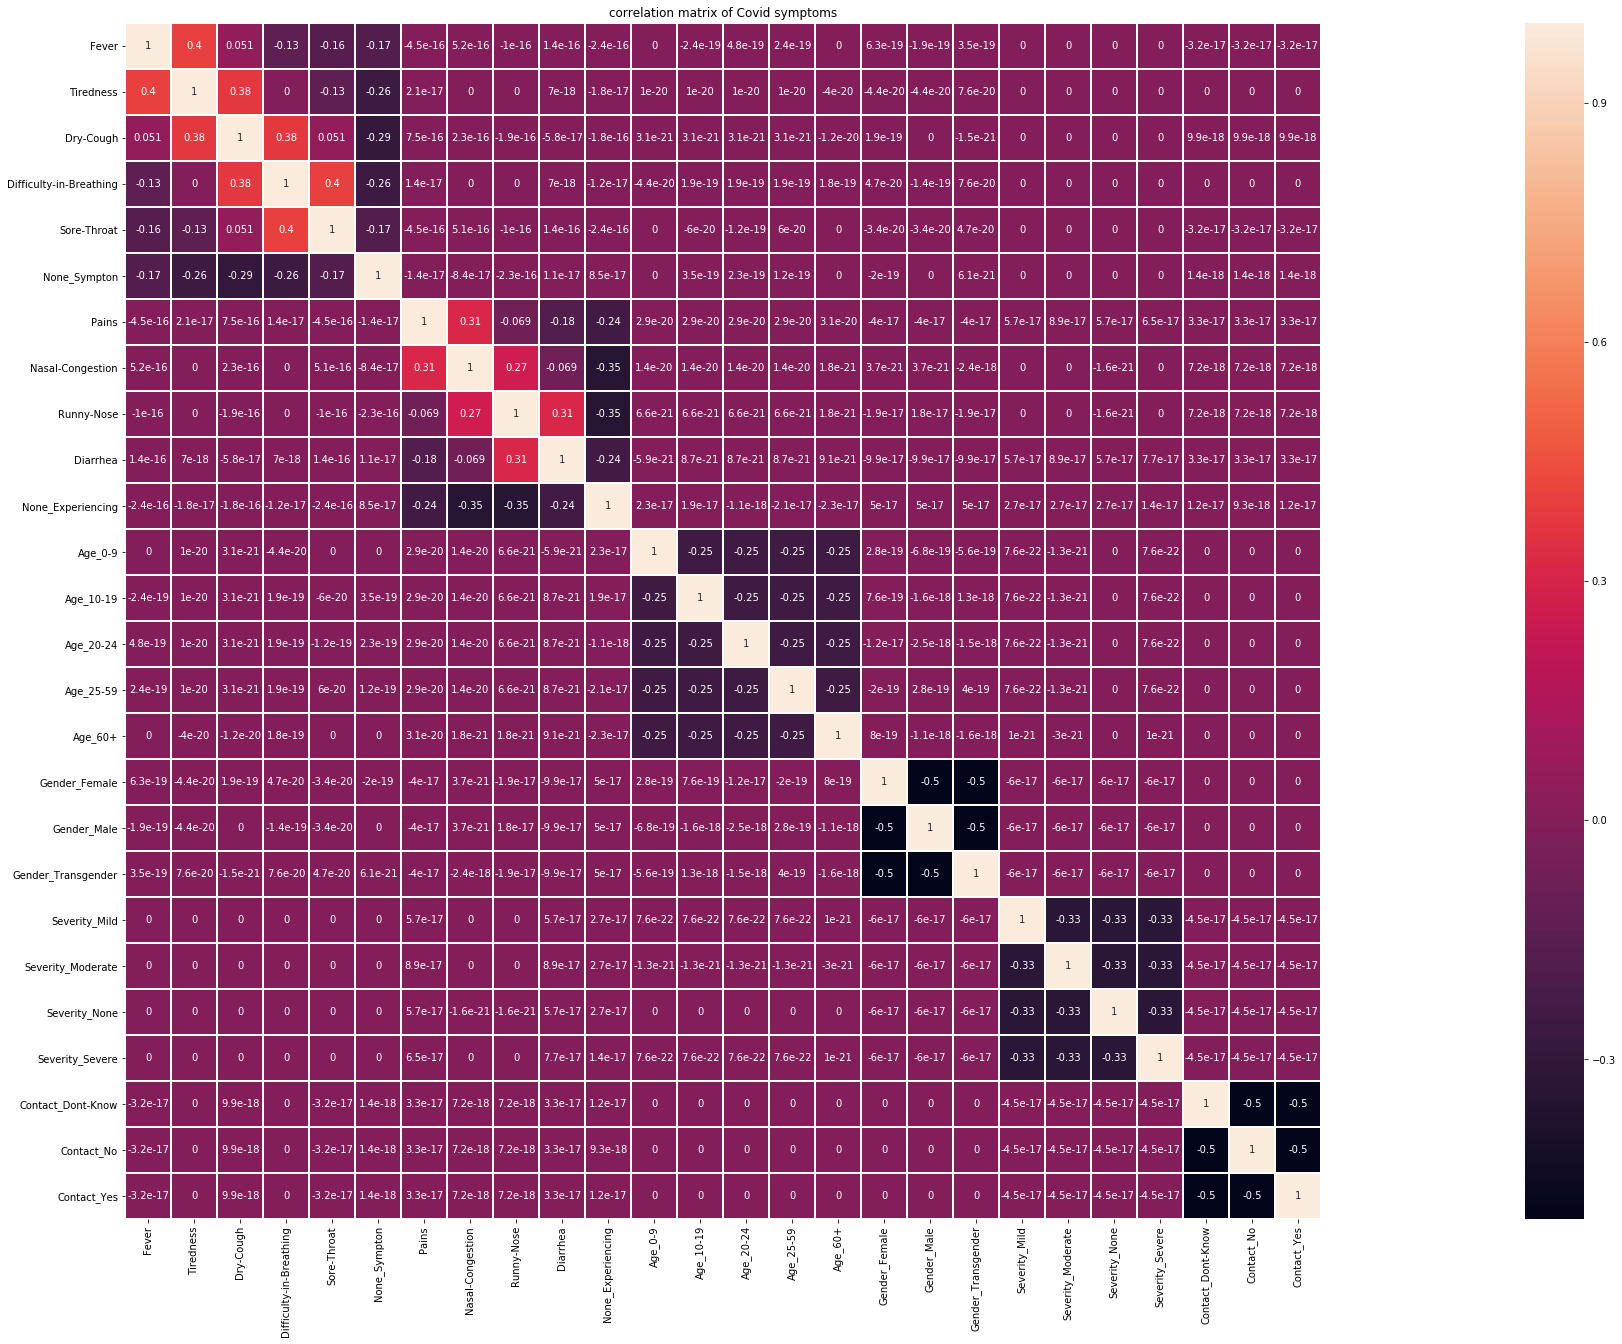

In [8]:
covid_map = covid_df.corr()

#heatmap visual
plt.figure(figsize=(73,22))

plt.subplot(1,1,1)
sns.heatmap(covid_map, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix of Covid symptoms")

plt.show()

Nothing stands out as high correlation, will keep all variables 

# Dimensionality Reduction methods with Clustering methods

Use: The silhouette coefficient is useful for situations where you want to compare the solutions of different clustering algorithms and you don't have a ground truth. Silhouette coefficients can be compared across algorithms, creating a one-number index to represent a clustering solution and compare it against others.

In [9]:
#using only 100000 obs
np.random.seed(123)

X, y = make_classification(n_samples=100000, n_features=27, random_state=123)

# First: PCA

In [10]:
# apply PCA 
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

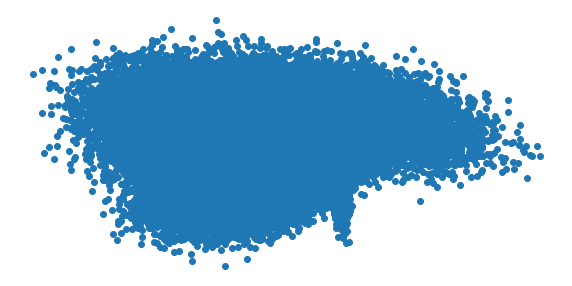

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [12]:
# Apply Clustering Methods 

In [13]:
# Standarizing the features
scaler = StandardScaler()
X_std_PCA = scaler.fit_transform(X)

# K-means

In [14]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_PCA)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_PCA, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660297077150248


# DBSCAN 

In [15]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_PCA)

In [16]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_PCA, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM 

In [17]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(X_std_PCA)

In [18]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std_PCA, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.0640664947376298


# Second t-SNE

In [19]:
# Standarizing the features
scaler = StandardScaler()
X_std_tsne = scaler.fit_transform(X)

In [20]:
#apply t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.174s...
[t-SNE] Computed neighbors for 100000 samples in 1096.794s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional pro

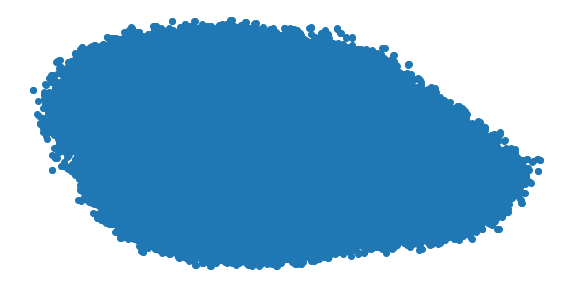

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [22]:
# Apply Clustering Methods

# K-means

In [23]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_tsne)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_tsne, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660297077150248


# DBSCAN

In [24]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_tsne)

In [25]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_tsne, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM

In [26]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std_tsne)

# Third: UMAP

In [27]:
map_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

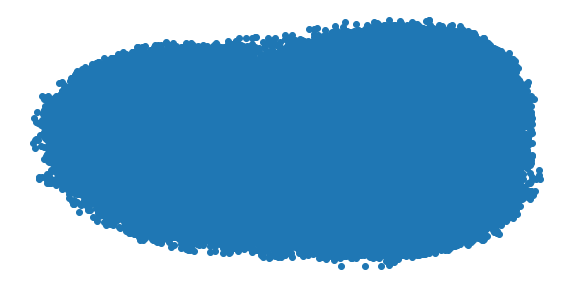

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(map_results[:, 0], map_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [29]:
# Standarizing the features
scaler = StandardScaler()
X_std_umap = scaler.fit_transform(X)

# K-means

In [30]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_umap)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_umap, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660297077150248


# DBSCAN 

In [31]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_umap)

In [32]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_umap, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM

In [33]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(X_std_umap)

In [34]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std_umap, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.0640664947376298


The best result shows up on K-means clustering technique on all dimensionality reduction techniques at roughly 0.066